In [17]:
# ---------------- Import Libraries ----------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# ---------------- Load Dataset ----------------
df = pd.read_csv("Chocolate Sales.csv")

In [19]:
# ---------------- View Columns and Sample Data ----------------
print("Columns Available:", df.columns)
print(df.head())

Columns Available: Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  


In [20]:
# ---------------- Clean Column Names ----------------
df.columns = df.columns.str.strip()  # remove extra spaces

In [21]:
# ---------------- Handle Missing Values ----------------
# Fill missing product names with mode
df['Product'] = df['Product'].fillna(df['Product'].mode()[0])

In [22]:
# Clean Amount column and rename to revenue
df['revenue'] = df['Amount'].replace(r'[\$,]', '', regex=True).astype(float)
df['revenue'] = df['revenue'].fillna(df['revenue'].median())

In [23]:
# Clean Boxes Shipped column and rename to quantity
df['quantity'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [24]:
# ---------------- Convert Date Column ----------------
df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')
df.dropna(subset=['Date'], inplace=True)

In [25]:
# ---------------- Feature Engineering ----------------
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [26]:
# ---------------- Prepare Data for Linear Regression ----------------
# Target variable: revenue
y = df['revenue']
# Features: year, month, day, quantity
X = df[['year', 'month', 'day', 'quantity']]

In [27]:
#---------------- Split Data into Training and Test Sets ----------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# ---------------- Train Linear Regression Model ----------------
# This creates a LinearRegression model and fits it to training data
model = LinearRegression()
model.fit(X_train, y_train)
# ---------------- Predict on Test Set ----------------
y_pred = model.predict(X_test)

In [29]:
# ---------------- Evaluate Model ----------------
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 16331855.655476766
R² Score: -0.00625683666907495


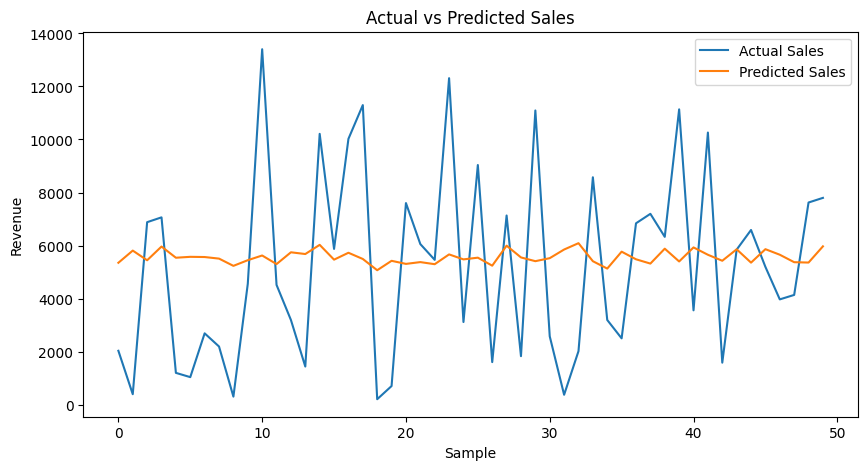

In [30]:
# ---------------- Plot Actual vs Predicted ----------------
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual Sales')
plt.plot(y_pred[:50], label='Predicted Sales')
plt.xlabel("Sample")
plt.ylabel("Revenue")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

In [ ]:
# ---------------- Forecast Future Sales ----------------
future_dates = pd.date_range(start=df['Date'].max(), periods=30, freq='D')
future_df = pd.DataFrame({
    'year': future_dates.year,
    'month': future_dates.month,
    'day': future_dates.day,
    'quantity': df['quantity'].median()  # assume median quantity for forecast
})

future_predictions = model.predict(future_df)
future_df['predicted_sales'] = future_predictions

print("\n---- Forecast for Next 30 Days ----")
print(future_df)


---- Forecast for Next 30 Days ----
    year  month  day  quantity  predicted_sales
0   2022      8   31     135.0      5380.075152
1   2022      9    1     135.0      4980.503595
2   2022      9    2     135.0      4990.149592
3   2022      9    3     135.0      4999.795590
4   2022      9    4     135.0      5009.441587
5   2022      9    5     135.0      5019.087584
6   2022      9    6     135.0      5028.733581
7   2022      9    7     135.0      5038.379578
8   2022      9    8     135.0      5048.025575
9   2022      9    9     135.0      5057.671573
10  2022      9   10     135.0      5067.317570
11  2022      9   11     135.0      5076.963567
12  2022      9   12     135.0      5086.609564
13  2022      9   13     135.0      5096.255561
14  2022      9   14     135.0      5105.901558
15  2022      9   15     135.0      5115.547555
16  2022      9   16     135.0      5125.193553
17  2022      9   17     135.0      5134.839550
18  2022      9   18     135.0      5144.485547
19 

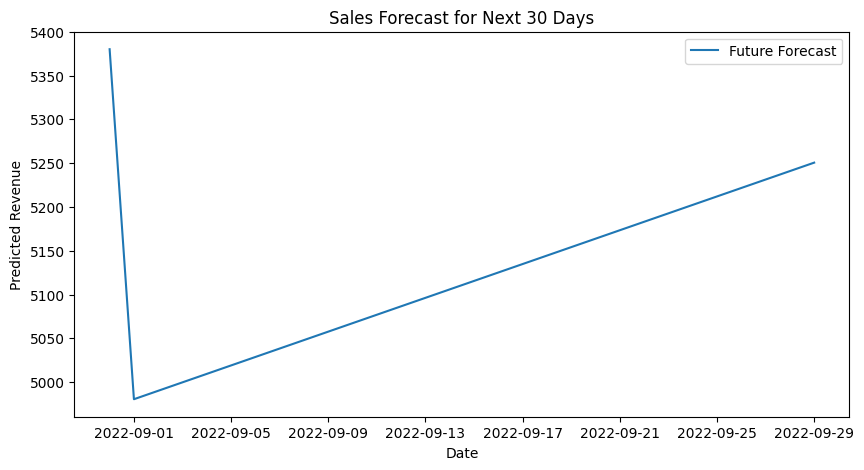

In [32]:
# ---------------- Plot Forecast ----------------
plt.figure(figsize=(10,5))
plt.plot(future_dates, future_predictions, label="Future Forecast")
plt.title("Sales Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Revenue")
plt.legend()
plt.show()